In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# LinearRegression vs SVR

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



scaler = StandardScaler()
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
linreg = LinearRegression()
sup_vec = SVR()

In [3]:
df = pd.read_csv("Data/ForestFires/forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
df.shape

(517, 13)

In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
df['month'] = df['month'].map(dict(zip(pd.unique(df['month']), np.arange(12))))
df['day'] = df['day'].map(dict(zip(pd.unique(df['day']), np.arange(7))))

Посмотрим на распределение фичей

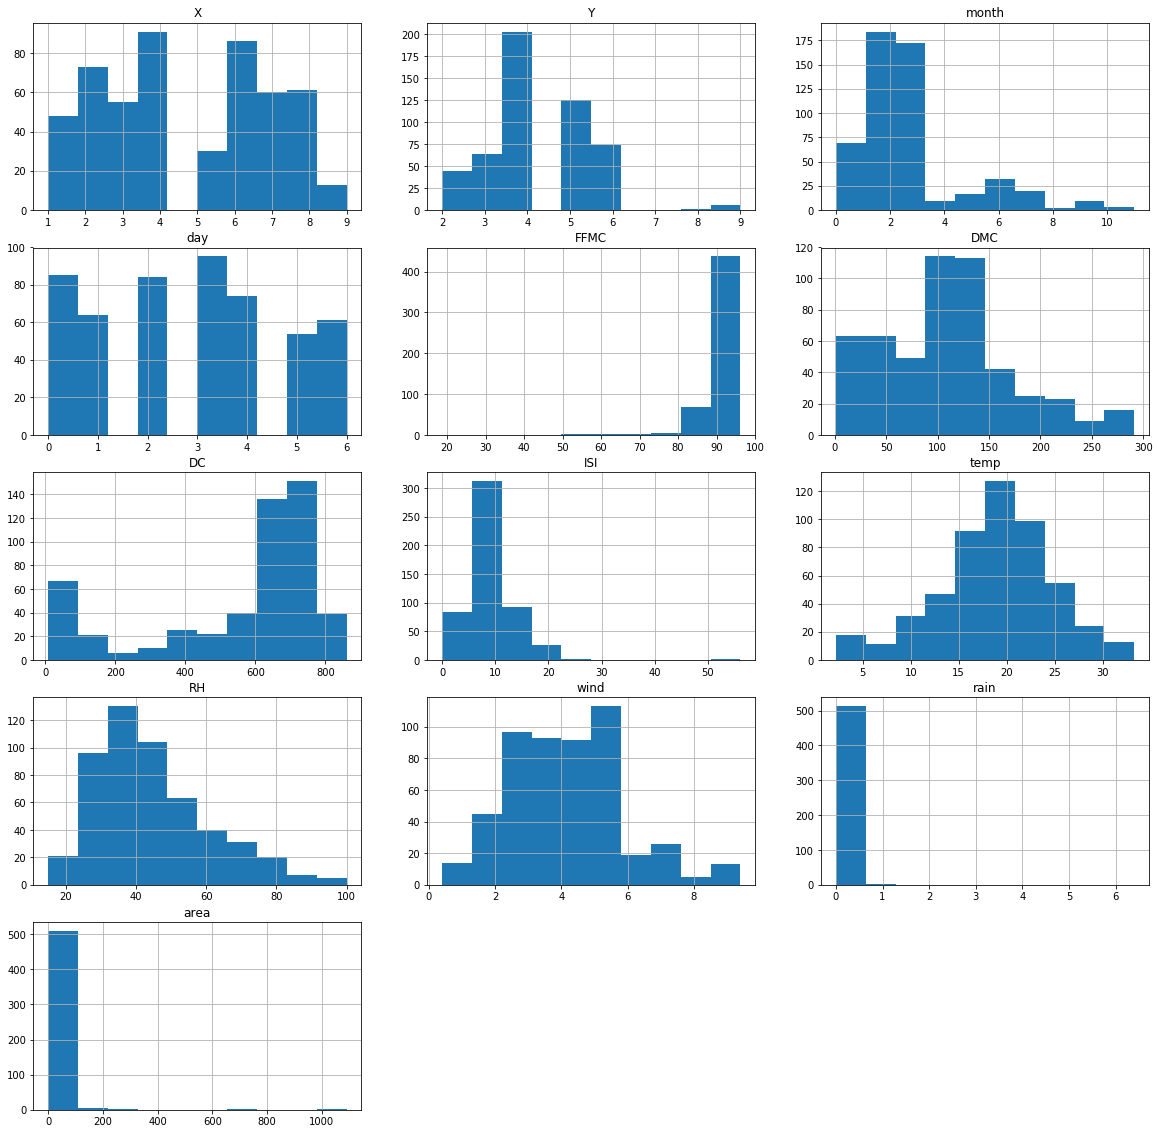

In [8]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    df['{}'.format(col)].hist()
    plt.title(col)

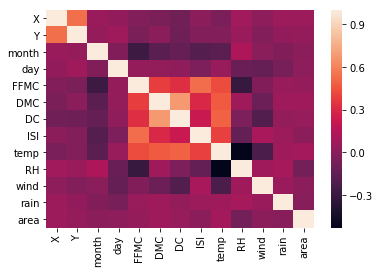

In [9]:
sns.heatmap(df.corr());

In [10]:
x, y = df.drop('area', axis=1), df['area']
x_train, x_valid, y_train, y_valid = train_test_split(x.values, y.values, test_size=0.3, random_state=50)
linreg.fit(x_train, y_train)
sup_vec.fit(x_train, y_train)

np.sqrt(mean_squared_error(y_valid, linreg.predict(x_valid))), np.sqrt(mean_squared_error(y_valid, sup_vec.predict(x_valid)))

(29.959165496415412, 28.719343384067955)

In [11]:
r2_score(y_valid, sup_vec.predict(x_valid)), r2_score(y_valid, linreg.predict(x_valid))

(-0.1314562810823987, -0.23125551601418137)

# Добавим Scaler & O-H-E

In [12]:
cat_features = ['month', 'day']
num_features = list(df.drop(cat_features, axis=1).columns[2:-1])


scaler.fit_transform(df[num_features])
df = pd.concat([df.drop(num_features, axis=1), pd.DataFrame(scaler.transform(df[num_features]),
                                                            columns = num_features)], axis=1).reindex()

enc.fit(df[cat_features])
df = pd.concat([df.drop(cat_features, axis=1), pd.DataFrame(enc.transform(df[cat_features]))], axis=1).reindex()
df.head()

,X,Y,area,FFMC,DMC,DC,ISI,temp,RH,wind,...,9,10,11,12,13,14,15,16,17,18
0,7,5,0.0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,0.0,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7,4,0.0,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,0.0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,0.0,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
x, y = df.drop('area', axis=1), df['area']
x_train, x_valid, y_train, y_valid = train_test_split(x.values, y.values, test_size=0.3, random_state=50)
linreg.fit(x_train, y_train)
sup_vec.fit(x_train, y_train)

np.sqrt(mean_squared_error(y_valid, linreg.predict(x_valid))), np.sqrt(mean_squared_error(y_valid, sup_vec.predict(x_valid)))

(29.2123649691593, 28.848262248506746)

In [14]:
r2_score(y_valid, sup_vec.predict(x_valid)), r2_score(y_valid, linreg.predict(x_valid))

(-0.14163711617837027, -0.17063687674746086)

`Scaler & O-H-E` слегка улучшает **LinearRegressor**

# Попробуем избавится от выбросов

Из описания датасета видим, что для целевого признака 75й процентиль равен `6.570000`, поэтому заменим значения, которые выше него медианой.

In [15]:
med = df['area'].median()
df['area'] = df['area'].apply(lambda x: x if x<6.5700 else med);

In [16]:
x, y = df.drop('area', axis=1), df['area']
x_train, x_valid, y_train, y_valid = train_test_split(x.values, y.values, test_size=0.3, random_state=50)
linreg.fit(x_train, y_train)
sup_vec.fit(x_train, y_train)

np.sqrt(mean_squared_error(y_valid, linreg.predict(x_valid))), np.sqrt(mean_squared_error(y_valid, sup_vec.predict(x_valid)))

(1.515647241661958, 1.6301328369980173)

In [17]:
r2_score(y_valid, sup_vec.predict(x_valid)), r2_score(y_valid, linreg.predict(x_valid))

(-0.19100865329546757, -0.02959207760287863)

## А что будет, если из датасета убрать только выбросы?

In [18]:
df = pd.read_csv("Data/ForestFires/forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [19]:
df['month'] = df['month'].map(dict(zip(pd.unique(df['month']), np.arange(12))))
df['day'] = df['day'].map(dict(zip(pd.unique(df['day']), np.arange(7))))

med = df['area'].median()
df['area'] = df['area'].apply(lambda x: x if x<6.5700 else med);

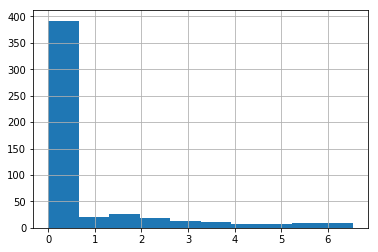

In [20]:
df['area'].hist();

In [21]:
x, y = df.drop('area', axis=1), df['area']
x_train, x_valid, y_train, y_valid = train_test_split(x.values, y.values, test_size=0.3, random_state=50)
linreg.fit(x_train, y_train)
sup_vec.fit(x_train, y_train)

np.sqrt(mean_squared_error(y_valid, linreg.predict(x_valid))), np.sqrt(mean_squared_error(y_valid, sup_vec.predict(x_valid)))

(1.5106880032848085, 1.5720001707446798)

In [22]:
r2_score(y_valid, sup_vec.predict(x_valid)), r2_score(y_valid, linreg.predict(x_valid))

(-0.10757744469997665, -0.022865394860694277)